In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
from sklearn.datasets import load_iris
import seaborn as sns
import japanize_matplotlib

# 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

### Home Creditはどのような企業？  

信用履歴が不十分であるか存在しないために、すべての人々がローンを取得するのに苦労しています。 そして、残念ながら、この人口は多くの場合、信頼できない貸し手によって利用されています。 Home Creditは、前向きで安全な借入経験を提供することによって、銀行で保護されていない人々のための金融包摂を拡大するよう努めています。  
### このコンペティションでは何を予測する？  

このようなサービスが行き届いていない人々が確実にローンの経験を積むことができるように、Home Creditは電話会社や取引情報を含むさまざまな代替データを利用して、顧客の返済能力を予測します。
### それを予測することで企業が得られるメリットは何？  

返済が可能な顧客が拒否されず、貸付金が元本、満期、および返済予定表とともに与えられ、顧客の成功が促進されます。

# 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

.mhead()、.info()、describe()などを使う
欠損値の有無を見る
クラスごとのデータ数をグラフに出す
それぞれ結果に対する説明や考察も行ってください

In [3]:
pd.set_option('display.max_rows', 500) #表示する行名を省略しない
pd.set_option('display.max_columns', 150)# 表示する列名を省略しない


#### データの概要を見てみる

In [2]:
df = pd.read_csv('application_train.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### ●各行が1つの申し込み情報を示す。

In [16]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 【信用情報機関データの概観】

In [50]:
df_1 = pd.read_csv('home-credit-default-risk/bureau.csv')
display(df_1.head())

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### 【信用情報機関残高データの概観】

In [55]:
df_2 = pd.read_csv('home-credit-default-risk/bureau_balance.csv')
display(df_2.head())

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### 【クレジットカード残高データの概観】

In [56]:
df_3 = pd.read_csv('home-credit-default-risk/credit_card_balance.csv')
display(df_3.head())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### 【POSキャッシュ残高データの概観】

In [57]:
df_4 = pd.read_csv('home-credit-default-risk/POS_CASH_balance.csv')
display(df_4.head())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


### 【過去の借入申請書データの概観】

In [66]:
df_5 = pd.read_csv('home-credit-default-risk/previous_application.csv')
df_5.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# 過去の借入申請書の契約状況
display(df_5['NAME_CLIENT_TYPE'].value_counts())

Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

#### ●まず欠損値を確認。

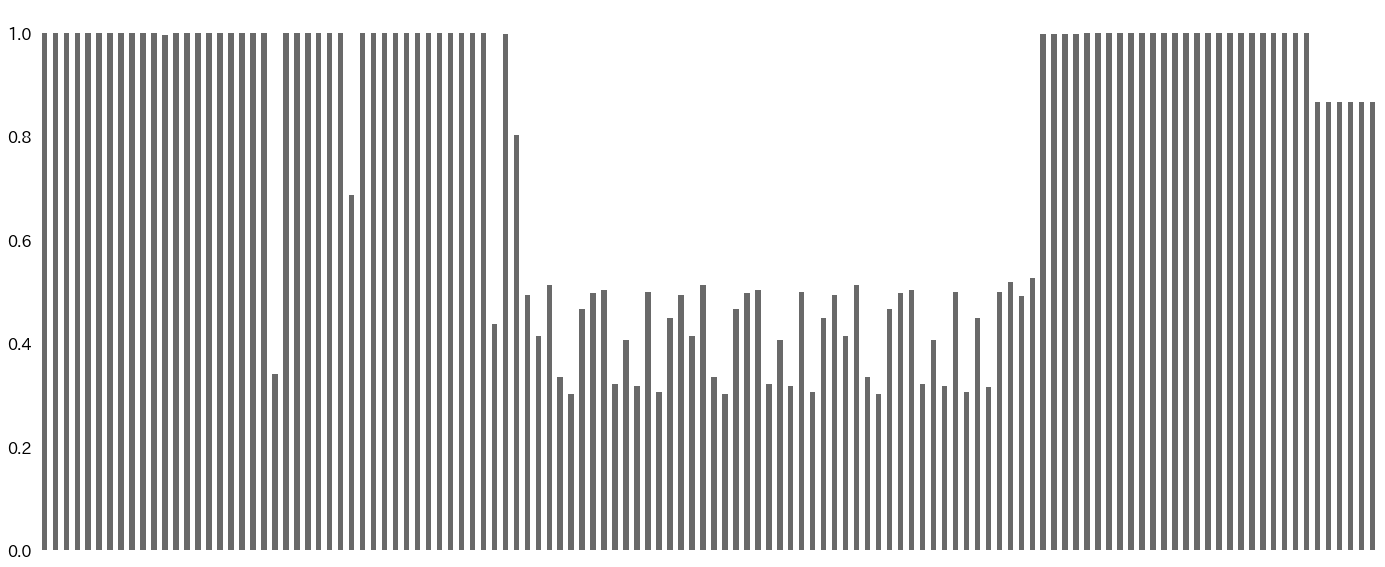

In [4]:
import missingno as msno
msno.bar(df);

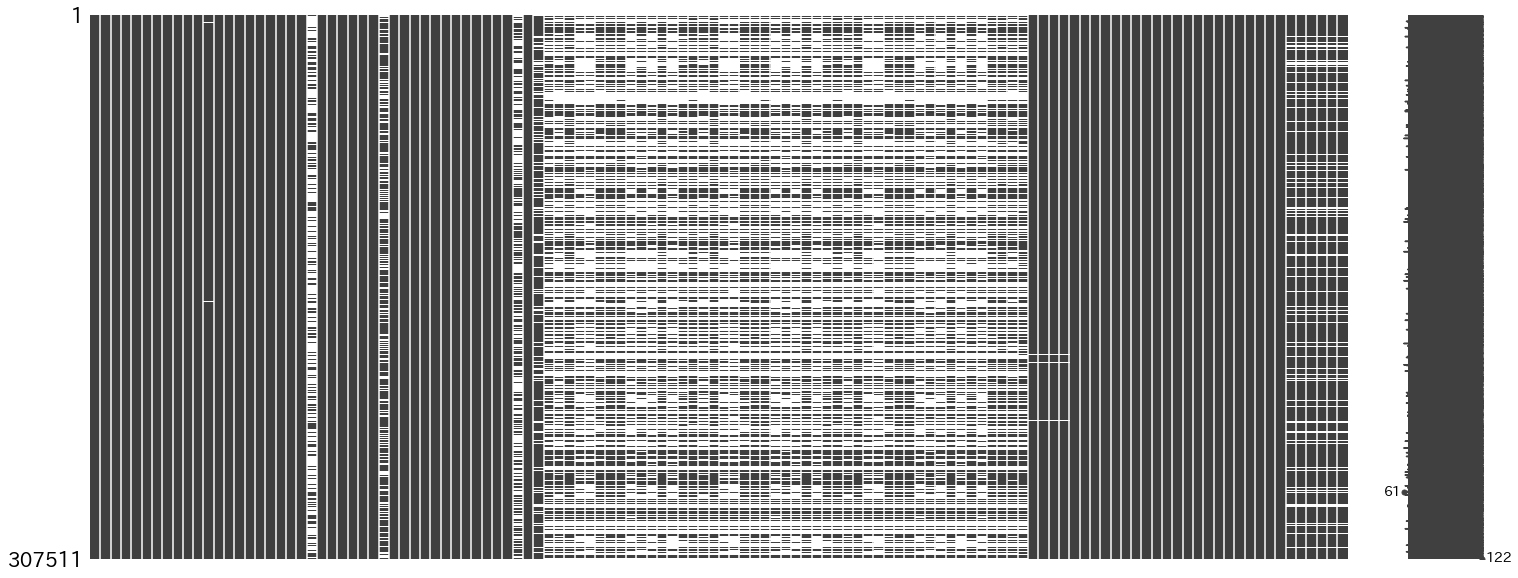

In [5]:
import missingno as msno
# 全体像を見る
msno.matrix(df)

#### 〇上記の２つのグラフから真ん中あたりのカラムは欠損が多くデータとして信頼に欠けるように思える。  


In [46]:
threshold = 0 #この値以下の欠損率の特徴量は表示しない
n_sample = len(df)
missing_rate = df.isnull().sum() / n_sample * 100
print("欠損値が{}%より高い特徴量は\n{}".format(threshold, missing_rate[missing_rate>threshold].head())) # とりあえず5行目まで
missing_rate.index

欠損値が0%より高い特徴量は
AMT_ANNUITY         0.003902
AMT_GOODS_PRICE     0.090403
NAME_TYPE_SUITE     0.420148
OWN_CAR_AGE        65.990810
OCCUPATION_TYPE    31.345545
dtype: float64


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

#### カラム44．【EXT_SOURCE_1】～97．【DEF_60_CNT_SOCIAL_CIRCLE 】  
#### （index４４～４６、外部データソースからの正規化スコア、  
#### index４７～９３．クライアントが住んでいる場所の建築に関する情報、  
#### index９４～９７観察可能な30 DPD（延滞日数）のデフォルトでクライアントの社会的環境の観察回数
#### 以上のカラムは=>欠損が多い。

In [7]:
#欠損値が何パーセント含まれるかを確認する。
missing_rate = df.isnull().sum() / len(df) * 100
print(missing_rate[missing_rate>0].head())

AMT_ANNUITY         0.003902
AMT_GOODS_PRICE     0.090403
NAME_TYPE_SUITE     0.420148
OWN_CAR_AGE        65.990810
OCCUPATION_TYPE    31.345545
dtype: float64


In [8]:
#欠損値がある特徴量の一覧は

missing_value = df.isnull().sum()
print("欠損値のある特徴量の一覧は\n{}".format(missing_value[missing_value>0].head()))

欠損値のある特徴量の一覧は
AMT_ANNUITY            12
AMT_GOODS_PRICE       278
NAME_TYPE_SUITE      1292
OWN_CAR_AGE        202929
OCCUPATION_TYPE     96391
dtype: int64


In [9]:
# 欠損のあるカラム一覧DFと％DFを連結する
df_missing = pd.concat([missing_rate, missing_value], axis=1) #missing_rate, missing_valueを列方向に連結
df_missing = df_missing.rename(columns={0: 'total', 1: 'missing_ratio'}) # ０列目をtotal, 1列目をmissing_ratioに名称変更
df_missing = df_missing.query("total>0 and missing_ratio>0") # total, missing_ratioの値が0以上のものを変数に格納
display(df_missing.head())

,total,missing_ratio
AMT_ANNUITY,0.003902,12
AMT_GOODS_PRICE,0.090403,278
NAME_TYPE_SUITE,0.420148,1292
OWN_CAR_AGE,65.990810,202929
OCCUPATION_TYPE,31.345545,96391


### 欠損値が5個以上ある特徴量は

In [10]:
threshold = 5
many_missing_rate = missing_rate[missing_rate>threshold]
many_missing_rate.head()

OWN_CAR_AGE        65.990810
OCCUPATION_TYPE    31.345545
EXT_SOURCE_1       56.381073
EXT_SOURCE_3       19.825307
APARTMENTS_AVG     50.749729
dtype: float64

In [11]:
threshold = 5 #　欠損値が5個以上ある特徴量は
print("欠損値が{}個以上の特徴量の一覧は\n{}".format(threshold, missing_rate[missing_rate>threshold].index))
missing_rate_5 = missing_rate[missing_rate>threshold].index #5個以上欠損値がある特徴量を変数に格納

欠損値が5個以上の特徴量の一覧は
Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', '

In [12]:
# 欠損が5個以上ある列を削除する
df_dropped_features = df.drop(missing_rate_5, axis=1)
display(df_dropped_features.head())
display("欠損が5個以上ある特徴量を削除すると残りは：{}列".format(len(df_dropped_features.columns)))
display(df_dropped_features.columns)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


'欠損が5個以上ある特徴量を削除すると残りは：65列'

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCI

### ●欠損値が5個以上ある特徴量を削除した65列から目的変数と相関の強そうな特徴量を見ていく。

In [13]:
# 横向き棒グラフ描画を関数化
#name_education = df['NAME_EDUCATION_TYPE']

def barh_graph(feature_name, xlabel="People", h=0.8):
    Feature_Name = df[feature_name].value_counts() # 特徴量のインデックス名と数量を取得
    Feature_Name_index = Feature_Name.index #取得した特徴量のインデックスのみを取得
    
    left = np.arange(len(Feature_Name_index))
    labels = Feature_Name_index
    
    title_name = feature_name
    plt.title(title_name, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.barh(left, Feature_Name, height=h, align='center')
    plt.yticks(left, labels)
    plt.show()



In [14]:
#円グラフを関数化

def pie(data, label):
    plt.pie(data, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%", radius=1.3
        , colors = ["red","yellow"],textprops = {"fontsize":"16"})

## 【目的変数の分布を見る。】

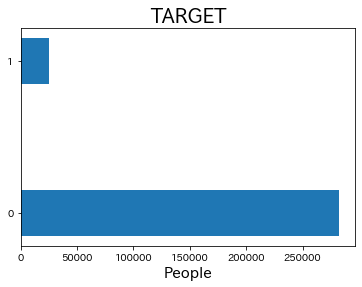

In [18]:
# targetの分布を棒グラフ化

barh_graph("TARGET", h=0.3)

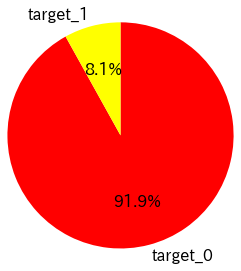

In [19]:
# targetの分布を円グラフ化
target_0 = len(df.query("TARGET=='0'"))
target_1 = len(df.query("TARGET=='1'"))

label_1 = ['target_0','target_1'] #ラベルを変数に格納
data_0_1 = np.array([target_0, target_1]) #ラベルの割合を配列化し変数に格納
pie(data_0_1, label_1)

#### 【考察】target0とtarget1の割合は"91.9%:8.1%"とtarget0の方が多い。

# 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

#### 「疑問」：どの特徴量がクラス分類に強く影響を与えるか？
#### 「課題」：targetと相関の強そうな特徴量を見つけるために仮説をたてグラフを描画し可視化する。  融資の申請者の収入、教育(学歴等）、職業種別、家族構成等の特徴量を中心にグラフ化していきtargetと相関の強さを探っていきたい。

# 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

## 【性別と目的変数との関係¶】

女性202448
男性105059


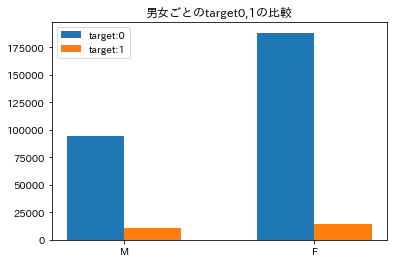

In [20]:
df_0_M = len(df.query("TARGET=='0'&CODE_GENDER=='M'"))
df_0_F = len(df.query("TARGET=='0'&CODE_GENDER=='F'"))
df_1_M = len(df.query("TARGET=='1'&CODE_GENDER=='M'"))
df_1_F = len(df.query("TARGET=='1'&CODE_GENDER=='F'"))

print("女性{}".format(df_0_F + df_1_F))
print("男性{}".format(df_0_M+df_1_M))

w = 0.3

df_M = np.array([df_0_M, df_0_F])
df_F = np.array([df_1_M, df_1_F])
x_label = np.arange(len(df_M))

plt.title("男女ごとのtarget0,1の比較")
plt.bar(x_label, df_M, width=w, label='target:0', align="center")
plt.bar(x_label + w, df_F, width=w, label='target:1', align="center")
plt.legend()
plt.xticks(x_label + w/2, ['M','F'])
plt.show()

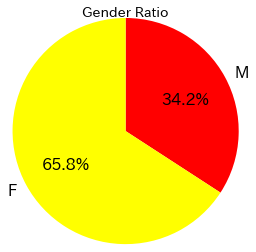

In [21]:
label_M_F = ['M','F'] #円グラフのラベルを変数に格納
data_M_F = np.array([df_0_M+df_1_M, df_0_F+df_1_F]) #ラベルの割合を配列化し変数に格納

#円グラフを描画

plt.title("Gender Ratio", fontsize=14)
pie(data_M_F, label_M_F)

#### 【考察」　男女比では女性の方が多く（202448人、65.8%）、男性の方が少ない（105059人、34.2％）

## 【婚姻状況・住居】¶

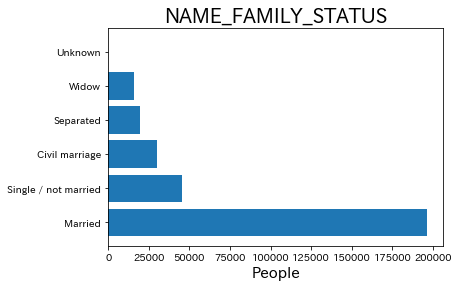

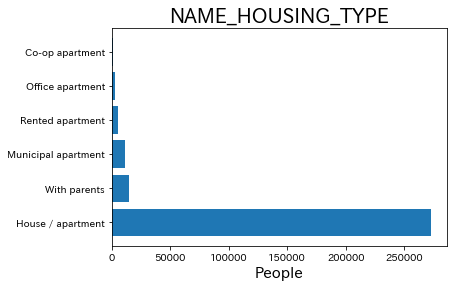

In [22]:
barh_graph("NAME_FAMILY_STATUS","People")
barh_graph("NAME_HOUSING_TYPE","People")

In [23]:
#"NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"

family_status = df["NAME_FAMILY_STATUS"].value_counts()
housing_type = df["NAME_HOUSING_TYPE"].value_counts()
display(family_status)
display(housing_type)

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

#### 【考察】婚姻状況は既婚者が多く、次に独身者、民事婚が続く。  
#### また、申請者の住まいの状況は、一軒家／アパートが多く、両親と同居、公営住宅が続く。

## 【教育の分布】

In [24]:
# NAME_EDUCATION_TYPE
# print(df.loc[:, df.columns.str.contains("NAME")].head())
#display(df['NAME_EDUCATION_TYPE'].value_counts())
display(df['NAME_EDUCATION_TYPE'].unique())

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [25]:
df['NAME_EDUCATION_TYPE'].head()

0    Secondary / secondary special
1                 Higher education
2    Secondary / secondary special
3    Secondary / secondary special
4    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

教育の分布：


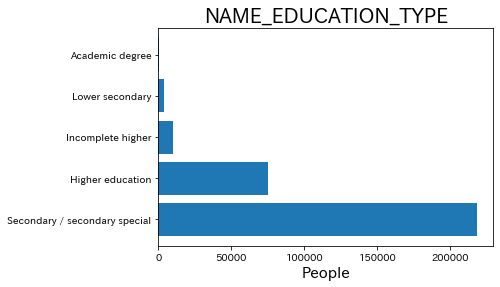

In [26]:
print("教育の分布：")
barh_graph('NAME_EDUCATION_TYPE', xlabel="People")

In [27]:
print("申請者の最終学歴の割合：")
display(df['NAME_EDUCATION_TYPE'].value_counts())
display(df['NAME_EDUCATION_TYPE'].value_counts().index)

申請者の最終学歴の割合：


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

#### 【教育と目的変数との関係】

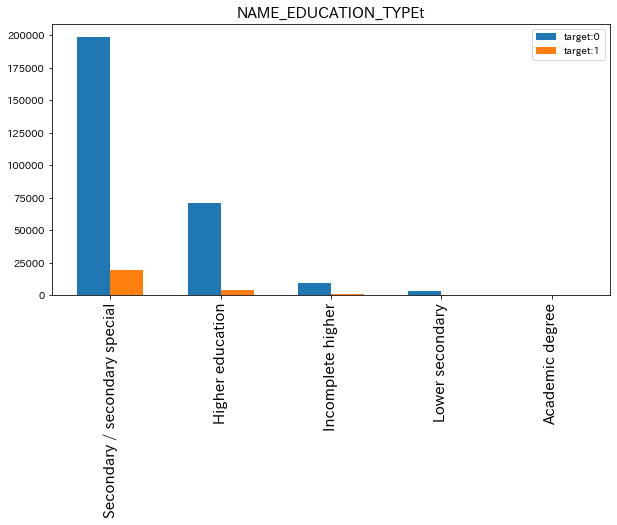

In [28]:
# df_NET_u = df['NAME_EDUCATION_TYPE'].unique()
name_edu = df['NAME_EDUCATION_TYPE'].value_counts()

edu_type = np.empty(5) #target_0の職業別の数値を格納する配列
edu_type_0 = np.empty(5) #target_1の職業別の数値を格納する配列

for i in range(5): #target_0の学歴別の割合を出す。
    edu = name_edu.index[i]
    took = len(df.query("TARGET=='0'&NAME_EDUCATION_TYPE == @edu"))
    edu_type[i] = took
    
for j in range(5): #target_1の学歴別の割合を出す。
    edu_0 = name_edu.index[j]
    take = len(df.query("TARGET=='1'&NAME_EDUCATION_TYPE==@edu_0"))
    edu_type_0[j]= take    
    
x_label_edu = np.arange(len(edu_type))


size=(10, 5)
w = 0.3

plt.figure(figsize=size)
plt.title("NAME_EDUCATION_TYPEt", fontsize=15)
plt.bar(x_label_edu, edu_type, width=w, label='target:0', align="center")
plt.bar(x_label_edu + w, edu_type_0, width=w, label='target:1', align="center")
plt.legend()
plt.xticks(x_label_edu + w/2, df['NAME_EDUCATION_TYPE'].value_counts().index.values, fontsize=15, rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x270803af9e8>,
 [Text(-1.0120714937025568, -1.3031543621669213, 'Secondary / secondary special'),
  Text(0.8122180364920126, 1.4362457523686745, 'Higher education'),
  Text(1.6214449588686364, 0.3056407128631366, 'Incomplete higher'),
  Text(1.648521545306496, 0.06983347807665748, 'Lower secondary'),
  Text(1.6499976839666906, 0.0027645803584158486, 'Academic degree')],
 [Text(-0.5520389965650309, -0.7108114702728661, '71.0%'),
  Text(0.4430280199047341, 0.7834067740192768, '24.3%'),
  Text(0.8844245230192561, 0.16671311610716538, '3.3%'),
  Text(0.8991935701671795, 0.03809098804181316, '1.2%'),
  Text(0.8999987367091037, 0.0015079529227722808, '0.1%')])

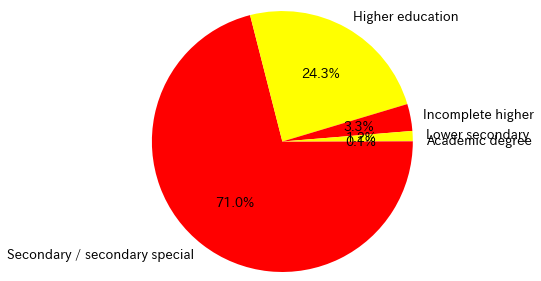

In [29]:
label_education = df['NAME_EDUCATION_TYPE'].value_counts().index
data_education = np.empty(len(df['NAME_EDUCATION_TYPE'].value_counts()))


for i in range(len(df['NAME_EDUCATION_TYPE'].value_counts())):
    data_education[i] = df['NAME_EDUCATION_TYPE'].value_counts()[i]

#円グラフを描画
#plt.title = ("Education Type")
plt.pie(data_education, labels=label_education, counterclock=False, startangle=0, autopct="%1.1f%%", radius=1.5
        , colors = ["red","yellow"],textprops = {"fontsize":"13"})

### 【考察】申請者の多くは中等教育が占め、次に高等教育が続く。

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

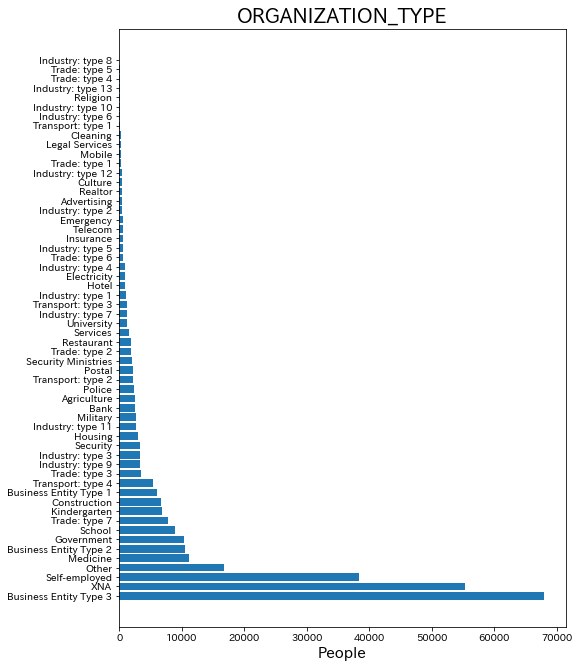

In [30]:
# ORGANIZATION_TYPE ,OCCUPATION_TYPE
sr_organization = df['ORGANIZATION_TYPE'].value_counts()
display(sr_organization)
plt.figure(figsize=(8, 11))
barh_graph('ORGANIZATION_TYPE', xlabel="People")



Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

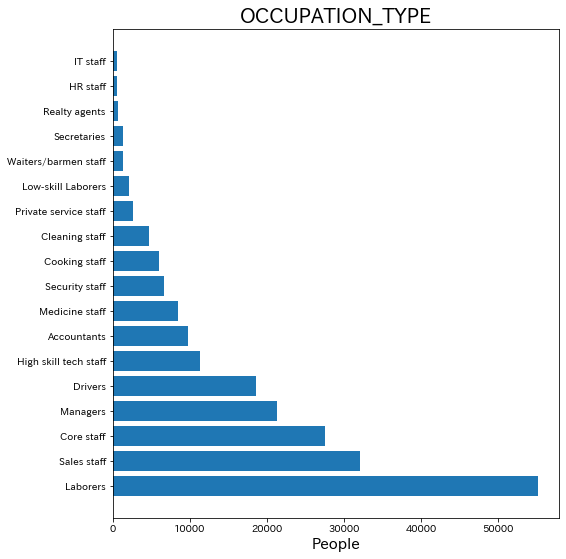

In [31]:
occ_type = df['OCCUPATION_TYPE'].value_counts()
display(occ_type)
plt.figure(figsize=(8, 9))
barh_graph('OCCUPATION_TYPE')

In [32]:
print("申請者の雇用形態の割合：")
occ_type = df['OCCUPATION_TYPE'].value_counts()
occ_type

申請者の雇用形態の割合：


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### 【考察】申請者の中で多い業種は労働者 、販売員 、コアスタッフ（一般的には、企業の事業を中核となって支える人材、あるいは経営をコントロールする側の人材）。  

#### 多い組織は第3種法人が最多でを占める

## 【借金額の分布】

In [33]:
# AMT_CREDIT
display()
display(df['AMT_CREDIT'].head())

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64

Skewness(歪度) : 1.2347784971349398
Kurtosis(尖度) : 1.9340413008324937


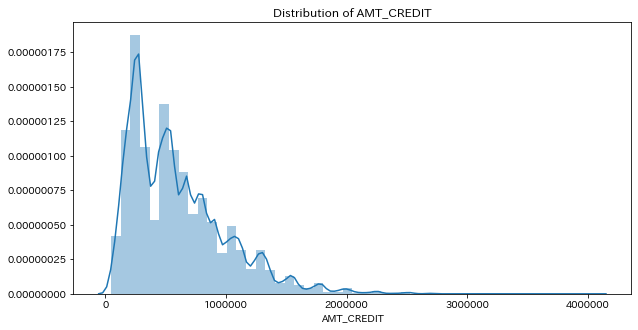

In [34]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of AMT_CREDIT')
sns.set_context("notebook", 1.3)
sns.distplot(df['AMT_CREDIT'])

var = 'AMT_CREDIT'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

In [35]:
#'AMT_CREDIT'

## 【年金の分布】

Skewness(歪度) : 1.5797773638612507
Kurtosis(尖度) : 7.707319914804311


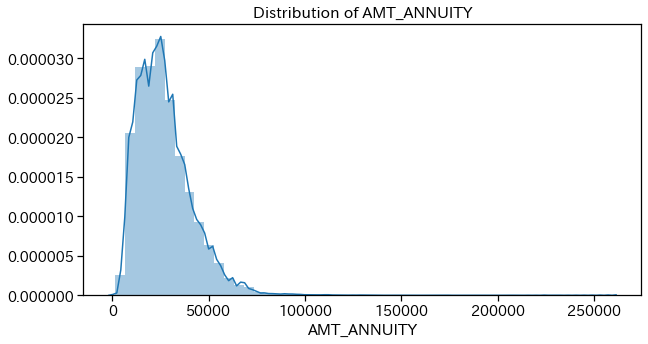

In [36]:
# AMT_ANNUITY
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of AMT_ANNUITY')
sns.set_context("notebook", 1.3)
sns.distplot(df['AMT_ANNUITY'].dropna())

var = 'AMT_ANNUITY'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

## 【商品価格の分布】  
#### ・ローンを組む目的である商品の価格

Skewness(歪度) : 1.3490003414747445
Kurtosis(尖度) : 2.4319164792166954


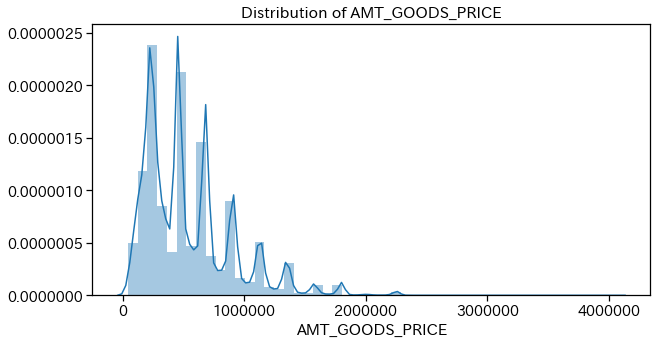

In [37]:
# AMT_GOODS_PRICE
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of AMT_GOODS_PRICE')
sns.set_context("notebook", 1.3)
sns.distplot(df['AMT_GOODS_PRICE'].dropna())

var = 'AMT_GOODS_PRICE'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

## 【相対地域人口分布の分布】  
#### ・相対地域人口：正規化された申請者が住んでいる地域の人口

Skewness(歪度) : 1.4880085207077678
Kurtosis(尖度) : 3.2600653343110517


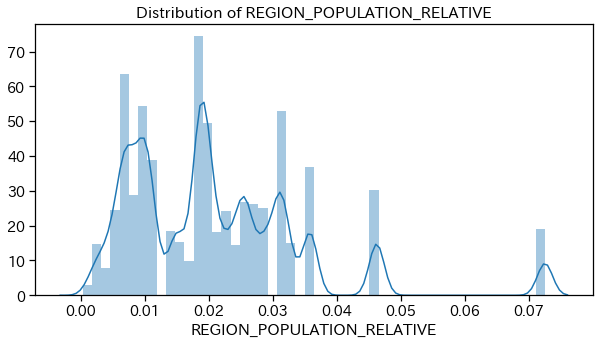

In [38]:
# REGION_POPULATION_RELATIVE

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of REGION_POPULATION_RELATIVE')
sns.set_context("notebook", 1.3)
sns.distplot(df['REGION_POPULATION_RELATIVE'].dropna())

var = 'REGION_POPULATION_RELATIVE'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

#### 【考察】申請者はより人口の多い地域に住んでいる。

## 【年齢の分布】  
#### ・申請者が借入申請日の何日前に生まれたか

Skewness(歪度) : -0.11567331170166129
Kurtosis(尖度) : -1.049125769946035


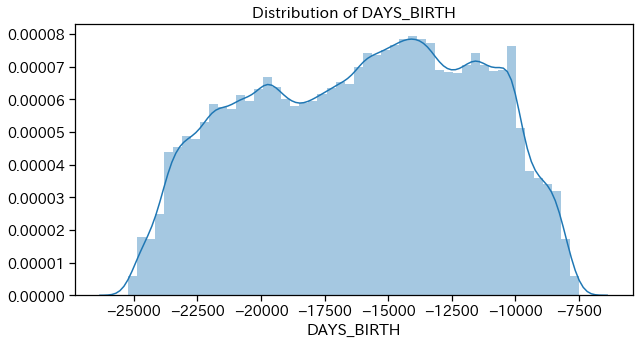

In [39]:
# DAYS_BIRTH

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of DAYS_BIRTH')
sns.set_context("notebook", 1.3)
sns.distplot(df['DAYS_BIRTH'].dropna())

var = 'DAYS_BIRTH'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

Skewness(歪度) : -0.11567331170165937
Kurtosis(尖度) : -1.0491257699460343


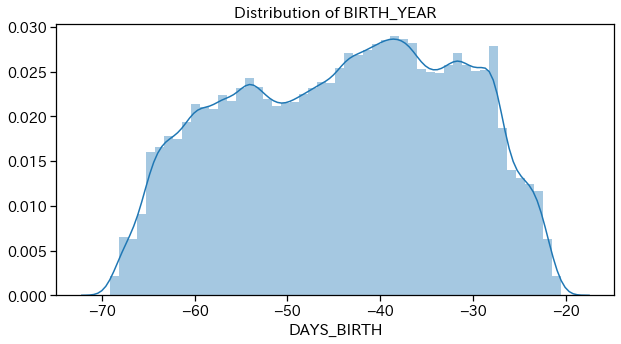

In [40]:
#何年前かに変換

df_birth = df['DAYS_BIRTH'] / 365 # 365で割る

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of BIRTH_YEAR')
sns.set_context("notebook", 1.3)
sns.distplot(df_birth)

var = df_birth
print("Skewness(歪度) :", df_birth.skew())
print("Kurtosis(尖度) :", df_birth.kurt())

#### 【考察】年齢の分布は40才前後が一番多く、続いて30代、50台と続く。

## 雇用日数の分布  
#### ・申請者が借入申請日の何日前から現在の仕事を始めたか

Skewness(歪度) : 1.6643461980685423
Kurtosis(尖度) : 0.7716123806586115


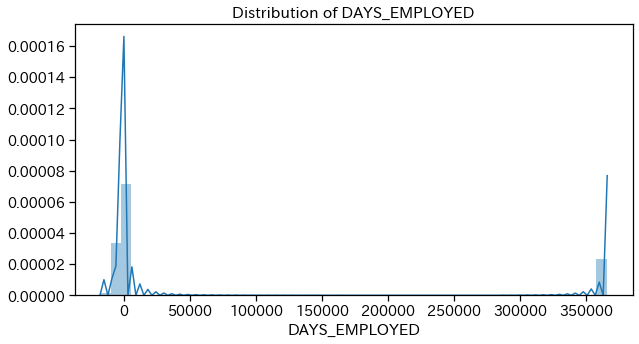

In [41]:
# DAYS_EMPLOYED

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of DAYS_EMPLOYED')
sns.set_context("notebook", 1.3)
sns.distplot(df['DAYS_EMPLOYED'].dropna())

var = 'DAYS_EMPLOYED'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

#### 【考察】借入申請日の直前に集中している。

## 【家族人数】

Skewness(歪度) : 0.9875428137192184
Kurtosis(尖度) : 2.8019769805254713


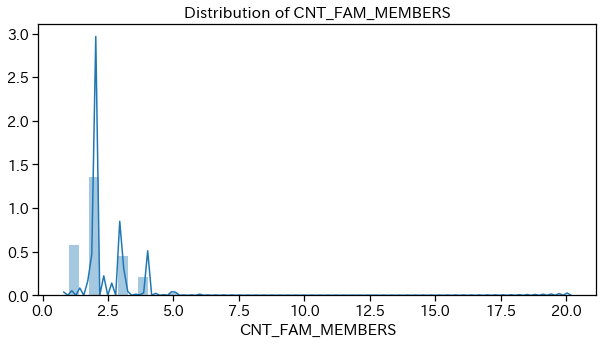

In [42]:
# CNT_FAM_MEMBERS

plt.rcParams["figure.figsize"] = (10,5)
plt.title('Distribution of CNT_FAM_MEMBERS')
sns.set_context("notebook", 1.3)
sns.distplot(df['CNT_FAM_MEMBERS'].dropna())

var = 'CNT_FAM_MEMBERS'
print("Skewness(歪度) :", df[var].skew())
print("Kurtosis(尖度) :", df[var].kurt())

In [43]:
# # Plot distribution of one feature
# def plot_distribution(feature,color):
#     plt.figure(figsize=(10,6))
#     plt.title("Distribution of %s" % feature)
#     sns.distplot(df[feature].dropna(),color=color, kde=True,bins=100)
#     plt.show()   


# 【問題5】（アドバンス課題）カーネルへの投稿
必須ではありませんが、コンペティションのKernelページに今回作成したEDAのノートブックを投稿することを推奨しています。